In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the CSV files
df1 = pd.read_csv('Project_Files/results/experiment_1.csv')
df2 = pd.read_csv('Project_Files/results/experiment_2.csv')
df3 = pd.read_csv('Project_Files/results/experiment_3.csv')

# Calculate the mean of each column
df1_last_epoch = df1.mean().to_frame().T
df2_last_epoch = df2.mean().to_frame().T
df3_last_epoch = df3.mean().to_frame().T

# Rename the index to reflect experiment numbers
df1_last_epoch.index = ['Experiment 1']
df2_last_epoch.index = ['Experiment 2']
df3_last_epoch.index = ['Experiment 3']

# Combine the dataframes
combined_df = pd.concat([df1_last_epoch, df2_last_epoch, df3_last_epoch])

# Highlight the max and min values
def highlight_max_min(data):
    attr = 'background-color: {}'
    max_color = 'lightgreen'
    min_color = 'lightcoral'
    
    # Create an empty DataFrame of strings
    df1 = pd.DataFrame('', index=data.index, columns=data.columns)
    
    # Find the columns of max and min values
    for col in data.columns:
        max_idx = data[col].idxmax()
        min_idx = data[col].idxmin()
        df1.at[max_idx, col] = attr.format(max_color)
        df1.at[min_idx, col] = attr.format(min_color)
    
    return df1

# Apply the highlight function
styled_df = combined_df.style.apply(highlight_max_min, axis=None)

# Display the styled DataFrame
styled_df


,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
Experiment 1,74.500000,0.032021,0.050479,0.005194,0.784634,0.750207,0.776831,0.515675,0.032487,0.053132,0.007168,0.005748,0.005081,0.005081
Experiment 2,74.500000,0.044335,0.068033,0.008539,0.709241,0.520629,0.562645,0.289575,0.049145,0.069718,0.011497,0.005748,0.005081,0.005081
Experiment 3,74.500000,0.043616,0.065926,0.009852,0.677195,0.531856,0.577462,0.337150,0.044427,0.068293,0.012428,0.005748,0.005081,0.005081


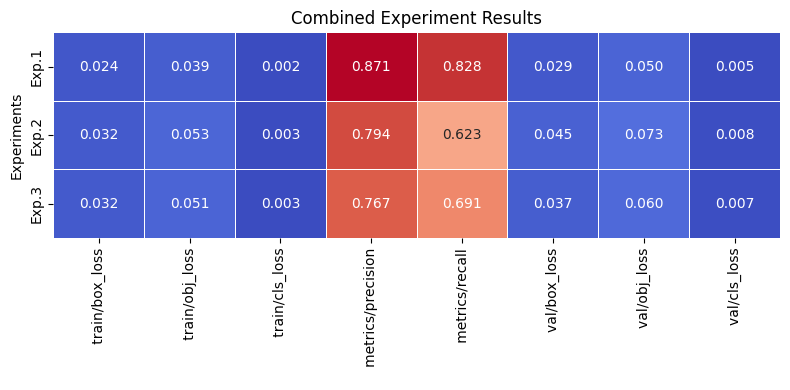

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('Project_Files/results/experiment_1.csv')
df2 = pd.read_csv('Project_Files/results/experiment_2.csv')
df3 = pd.read_csv('Project_Files/results/experiment_3.csv')

df1_last_epoch = df1.drop(columns=['               x/lr0', '               x/lr1', '               x/lr2', '               epoch','     metrics/mAP_0.5','metrics/mAP_0.5:0.95']).iloc[-1]
df2_last_epoch = df2.drop(columns=['               x/lr0', '               x/lr1', '               x/lr2', '               epoch','     metrics/mAP_0.5','metrics/mAP_0.5:0.95']).iloc[-1]
df3_last_epoch = df3.drop(columns=['               x/lr0', '               x/lr1', '               x/lr2', '               epoch','     metrics/mAP_0.5','metrics/mAP_0.5:0.95']).iloc[-1]

# Convert to DataFrame
df1_last_epoch = df1_last_epoch.to_frame().T
df2_last_epoch = df2_last_epoch.to_frame().T
df3_last_epoch = df3_last_epoch.to_frame().T

df1_last_epoch.index = ['Exp.1']
df2_last_epoch.index = ['Exp.2']
df3_last_epoch.index = ['Exp.3']

combined_df = pd.concat([df1_last_epoch, df2_last_epoch, df3_last_epoch])

def highlight_max_min(data):
    attr = [['background-color: lightgreen' if v == data.max().max() else 'background-color: lightcoral' if v == data.min().min() else '' for v in data.iloc[i]] for i in range(len(data))]
    return attr

fig, ax = plt.subplots(figsize=(8, 4))

ax = sns.heatmap(combined_df, annot=True, cmap='coolwarm', cbar=False, fmt=".3f", linewidths=.5, ax=ax)

ax.set_ylabel('Experiments')

plt.title('Combined Experiment Results')
plt.tight_layout()
plt.show()
